<a href="https://colab.research.google.com/github/pranjalrawat007/MacroTheory/blob/main/CakeEating.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Infinite Horizon Case

Let $x_{t}$ be the amount of cake at start of period $t$. The problem is to,

$\underset{\{x_{t}\}_{t=1}^{\infty}} \max \sum_{t=0}^{\infty}\beta u(x_{t}-x_{t+1})$

such that $x_{0} > 0$, $u(c) = log(c)$ and $\beta \in (0,1)$.

## Log-Utility

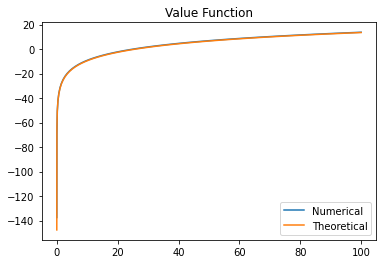

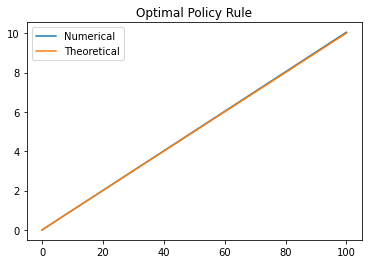

In [1]:
from numpy import log, linspace, zeros, interp, sqrt
from scipy.interpolate import PchipInterpolator
from scipy.optimize import minimize
import matplotlib.pyplot as plt

# Structure
x0 = 100;
beta = 0.9;
utility = lambda x: log(x)

# Hyperparams
grid = 50;
maxIter = 50;
min_state =1e-5;
exp = 2 # oversampling

# Arrays
state = linspace(min_state**(1/exp),x0**(1/exp),grid)**exp ;
value = zeros((2, grid));
policy = zeros(grid);
current = iter = 1; 
value[current, :] = utility(state)

while (iter <= maxIter):
  iter = iter + 1;
  previous = current; 
  current = 1 - (previous == 1);
  for i in range(grid):
    min_control = min_state/10
    old = PchipInterpolator(state, value[previous, :], axis=0,extrapolate=True)
    def w(x):
      #oldval = interp(state[i] - x, state, value[previous, :])   
      return - utility(x) - beta * old(state[i] - x)
    res = minimize(w, min_control, bounds= ([(min_control, state[i])]))
    newpol, newval = res.x, -res.fun
    value[current, i] = newval
    policy[i] = newpol

value_actual = lambda x: (1/(1-beta))*log((1-beta)*x) + beta*log(beta)/((1-beta)**2)

# Verification
plt.figure(1)
plt.plot(state, value[current, :], label = 'Numerical' ) # numerical
plt.plot(state, value_actual(state), label = 'Theoretical') # theoretical
plt.title('Value Function')
plt.legend()
plt.figure(2)
plt.plot(state, policy, label = 'Numerical' ) # numerical
plt.plot(state, (1-beta)*state, label = 'Theoretical') # theoretical
plt.title('Optimal Policy Rule')
plt.legend()
plt.show()


## CARA Utility

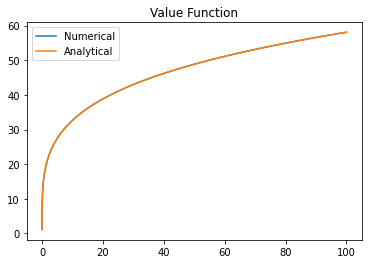

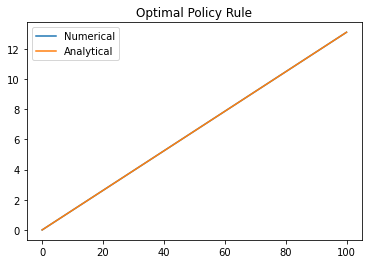

In [ ]:
from numpy import log, linspace, zeros, interp
from scipy.interpolate import PchipInterpolator
import matplotlib.pyplot as plt

# Problem Params
initial_resource = 100;
beta = 0.9;rho = 0.75
utility = lambda x: x**(1-rho)/(1-rho)

# Hyperparams
grid = 100;
maxIter = 100;
min_state =1e-5;
exp = 2 # oversampling

# Arrays
state = linspace(min_state**(1/exp),initial_resource**(1/exp),grid)**exp ;
value = zeros((2, grid));
policy = zeros(grid);
current = iter = 1; 
value[current, :] = utility(state)

while (iter <= maxIter):
  iter = iter + 1;
  previous = current; 
  current = 1 - (previous == 1);
  for i in range(grid):
    min_control = min_state/10
    old = PchipInterpolator(state, value[previous, :], axis=0,extrapolate=True)
    def w(x):
      #oldval = interp(state[i] - x, state, value[previous, :])   
      return - utility(x) - beta * old(state[i] - x)
    res = minimize(w, min_control, bounds= ([(min_control, state[i])]))
    newpol, newval = res.x, -res.fun
    value[current, i] = newval
    policy[i] = newpol

# Verification
plt.figure(1)
plt.plot(state, value[current, :], label = 'Numerical' )
plt.plot(state, (1-beta**(1/rho))**(-rho)*utility(state), label = 'Analytical') 
plt.title('Value Function')
plt.legend()
plt.figure(2)
plt.plot(state, policy, label = 'Numerical' )
plt.plot(state, (1-beta**(1/rho))*state, label = 'Analytical' )
plt.title('Optimal Policy Rule')
plt.legend()
plt.show()
